#Classification with feature selection
This lab asks you to create a classification model on the breast cancer dataset where the targeted class is in the Diagnosis column (M = malignant, B = benign).


*   Task 1:  Create a machine learning model with a full set of features to predict the targeted class. (don't forget to remove unique id column)
*   Task 2: Apply any teachniques on feature engineering to get a model with at least 95% accuracy



In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
import os

# !gdown --id 1NNu6rF6AYUXsMlHjApMwGHbT7HxFTu5m

#os for my macbook
os.chdir('/Users/fulinq/Documents/KMITL/FinancialEngineering/Y2/T2/FE_IntroToDataScience/week13')
df = pd.read_csv('Breast_Cancer_Wisconsin.csv')

#given code
# df = pd.read_csv("/content/Breast_Cancer_Wisconsin.csv")

df = df.iloc[:,:-1]
print(df.info())
print(df["diagnosis"].value_counts())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Task 1

[[0.18684867 0.         0.17455104 ... 0.15856011 0.12313527 0.14301661]
 [0.30818533 0.13561042 0.29348054 ... 0.31598347 0.28647282 0.11812988]
 [0.37227849 0.43862022 0.36754944 ... 0.38064072 0.16561315 0.16304419]
 ...
 [0.26806595 0.10551234 0.24484662 ... 0.09231829 0.17117573 0.09895594]
 [0.26219482 0.08657423 0.24561526 ... 0.36858422 0.38103666 0.13599054]
 [0.51318558 0.50625634 0.50527566 ... 0.592835   0.14083439 0.24814499]]
[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0]


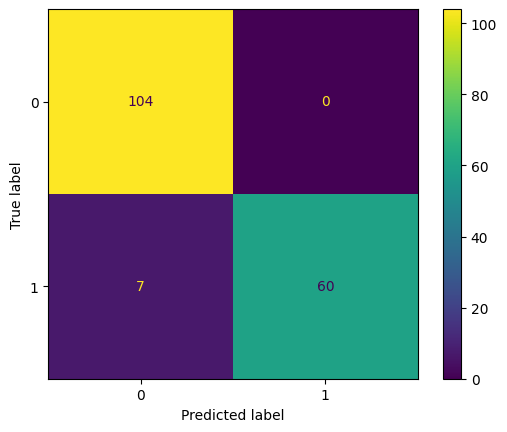

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       104
           1       1.00      0.90      0.94        67

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [41]:
df = df.drop('id', axis=1)

label = LabelEncoder()
x = df.drop("diagnosis", axis=1)
y = label.fit_transform(df['diagnosis'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=2)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print(x_train)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_predict = logisticRegr.predict(x_test)

print(y_predict)

cm = np.array(confusion_matrix(y_test, y_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.show()

print(classification_report(y_test, y_predict))


# Task 2

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

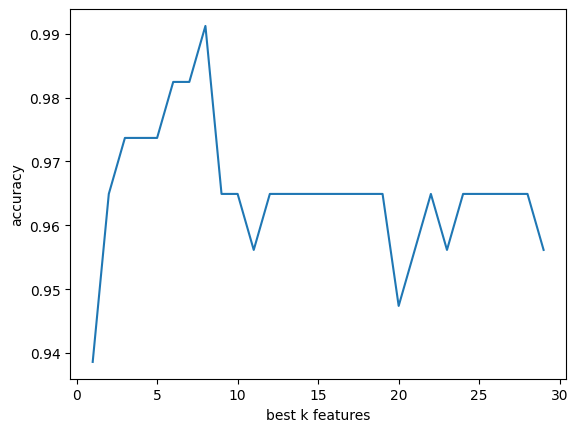

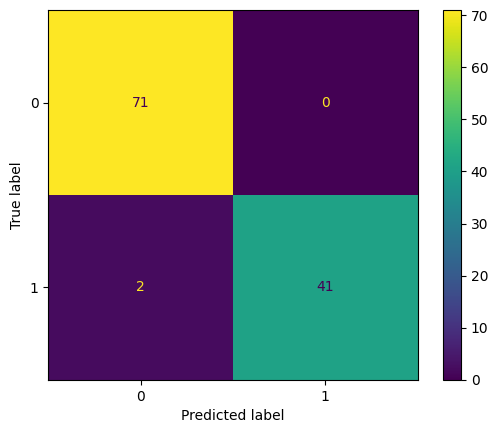

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [43]:
import sklearn.feature_selection as fs

accuracy_list = []
for k in range(1, 30):
    bk = fs.SelectKBest(fs.chi2, k=k)
    bk.fit(x, y)
    X_trans = bk.transform(x)
    train_x, test_x, train_y, test_y = train_test_split(X_trans, y, test_size=0.2, random_state=42)

    lr = LogisticRegression()
    lr.fit(train_x, train_y)
    y_pred = lr.predict(test_x)
    accuracy = metrics.accuracy_score(test_y, y_pred)
    accuracy_list.append(accuracy)

fig, axe = plt.subplots(dpi = 100)
axe.plot(range(1, 30), accuracy_list)
axe.set_xlabel("best k features")
axe.set_ylabel("accuracy")
plt.show()

selector = fs.SelectKBest(fs.chi2, k='all')
x_new = selector.fit_transform(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# print(x_train)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_predict = logisticRegr.predict(x_test)

# print(y_predict)

cm = np.array(confusion_matrix(y_test, y_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.show()

print(classification_report(y_test, y_predict))